### Example analysis

In [1]:
# This allows us to manually edit the code and have it reflected in this notebook
%load_ext autoreload
%autoreload 2

In [2]:
# import everything we need

import json # to prettyprint ordereddict

import numpy as np
import pandas as pd # using pd.__version__ == 0.24.2, There are newer versions and things might break!!!

print('pd.__version__:', pd.__version__)

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display, clear_output
import ipywidgets

from samiPostAnalysis import samiPostAnalysis

pd.__version__: 0.24.2


### Create a samiPostAnalysis object with all of our sekelton analysis across groups (wtf, wtm, kof, kom)

This assumes eveything has been processed with samiAnalysis.py

In particular

```
wtfPath = '../analysis/wt-female_results.csv'
kofPath = '../analysis/ko-female_results.csv'
wtmPath = '../analysis/wt-male_results.csv'
komPath = '../analysis/ko-male_results.csv'
```


In [3]:
spa = samiPostAnalysis()

samiPostAnalysis() is loading analysis files
    loading: ../batch/wt-female_results.csv
    loading: ../batch/ko-female_results.csv
    loading: ../batch/wt-male_results.csv
    loading: ../batch/ko-male_results.csv


### Throughout this analysis we will be using a 'pruneDict' to specify the data to pull from the raw analysis.

Fetch a default pruneDict with

```
pruneDict = spa.getDefaultPruneDict()
```

'genotype': in ('wt', 'ko')
'sex': in ('male', 'female')
'branchType' : specifies branch type as xxx

In [4]:
pruneDict = spa.getDefaultPruneDict()
print(json.dumps(pruneDict, indent=4))


{
    "genotype": [],
    "sex": [],
    "branchType": [
        2
    ],
    "useRemove": true,
    "statName": "len3d",
    "minValue": 1,
    "doCellMean": false,
    "statTest": "Mann-Whitney"
}


### Per cell mean of 'female' len3d

In [5]:
# set up a pruneDict to specify what we want
pruneDict = spa.getDefaultPruneDict()
pruneDict['sex'] = ['female']
pruneDict['statName'] = 'len3d'

# get the per cell mean
dfCellMean = spa.getCellMean(pruneDict, verbose=False)

# display results
display(dfCellMean)

genotype     sex  myCellNumber      mean       std       sem  count
0        ko  female           0.0  1.723933  0.813834  0.053546    231
1        ko  female           1.0  1.830423  0.878221  0.041354    451
2        ko  female           2.0  1.698641  0.783671  0.039184    400
3        ko  female           3.0  1.967751  0.976656  0.047264    427
4        ko  female           4.0  1.860215  1.107120  0.061987    319
5        ko  female           5.0  1.687648  0.687586  0.063841    116
6        ko  female           6.0  1.624616  0.724712  0.055259    172
7        ko  female           7.0  1.575322  0.557798  0.055780    100
8        ko  female           8.0  1.530698  0.703725  0.109903     41
9        ko  female           9.0  1.640530  0.680533  0.078063     76
10       ko  female          10.0  1.527319  0.567897  0.069380     67
11       ko  female          11.0  1.563115  0.531492  0.091150     34
12       ko  female          12.0  1.531259  0.611093  0.087299     49
13       ko  female          13.0  1.518691  0.520978  0.039724    172
14       ko  female          14.0  2.019083  0.920918  0.124177     55
15       ko  female          15.0  1.409617  0.564171  0.083183     46
16       ko  female          16.0  1.530342  0.468202  0.059462     62
17       ko  female          17.0  1.533773  0.680678  0.061626    122
18       ko  female          18.0  1.464043  0.499275  0.068581     53
19       ko  female          19.0  1.781269  0.827493  0.096194     74
20       ko  female          20.0  1.727612  0.659413  0.081168     66
21       ko  female          21.0  1.473992  0.579946  0.067878     73
22       ko  female          22.0  1.513139  0.504439  0.051484     96
23       ko  female          23.0  1.485772  0.490168  0.060798     65
24       ko  female          24.0  1.885705  0.881922  0.090963     94
25       wt  female           0.0  1.880598  1.076043  0.063517    287
26       wt  female           1.0  1.686416  0.928993  0.071888    167
27       wt  female           2.0  1.534599  0.481366  0.040114    144
28       wt  female           3.0  1.844261  0.894988  0.098835     82
29       wt  female           4.0  1.808602  0.735962  0.088599     69
30       wt  female           5.0  1.738307  0.651828  0.074770     76
31       wt  female           6.0  1.666069  0.616196  0.068466     81
32       wt  female           7.0  1.610615  0.807163  0.095125     72
33       wt  female           8.0  1.661655  0.700854  0.083176     71
34       wt  female           9.0  2.055254  0.967883  0.119138     66
35       wt  female          10.0  1.806029  0.841847  0.095320     78
36       wt  female          11.0  1.862662  1.217043  0.173863     49
37       wt  female          12.0  1.543014  0.563115  0.073941     58
38       wt  female          13.0  1.854782  1.057251  0.145225     53
39       wt  female          14.0  1.486440  0.636264  0.091837     48
40       wt  female          15.0  1.695822  0.845038  0.114995     54
41       wt  female          16.0  1.384109  0.419392  0.050859     68
42       wt  female          17.0  1.506776  0.593867  0.072552     67
43       wt  female          18.0  1.708549  0.675525  0.070428     92
44       wt  female          19.0  2.211510  1.255569  0.167783     56
45       wt  female          20.0  1.506680  0.494178  0.042532    135
46       wt  female          21.0  1.639414  0.810038  0.089454     82
47       wt  female          22.0  1.934008  1.091069  0.144516     57

### Plot all raw data.

Problem here is each cell has different number of branches and we are not weighing the contribution of each cell...

'\nplt.close(2)\nplt.close(3)\nplt.close(4)\nplt.close(5)\n'

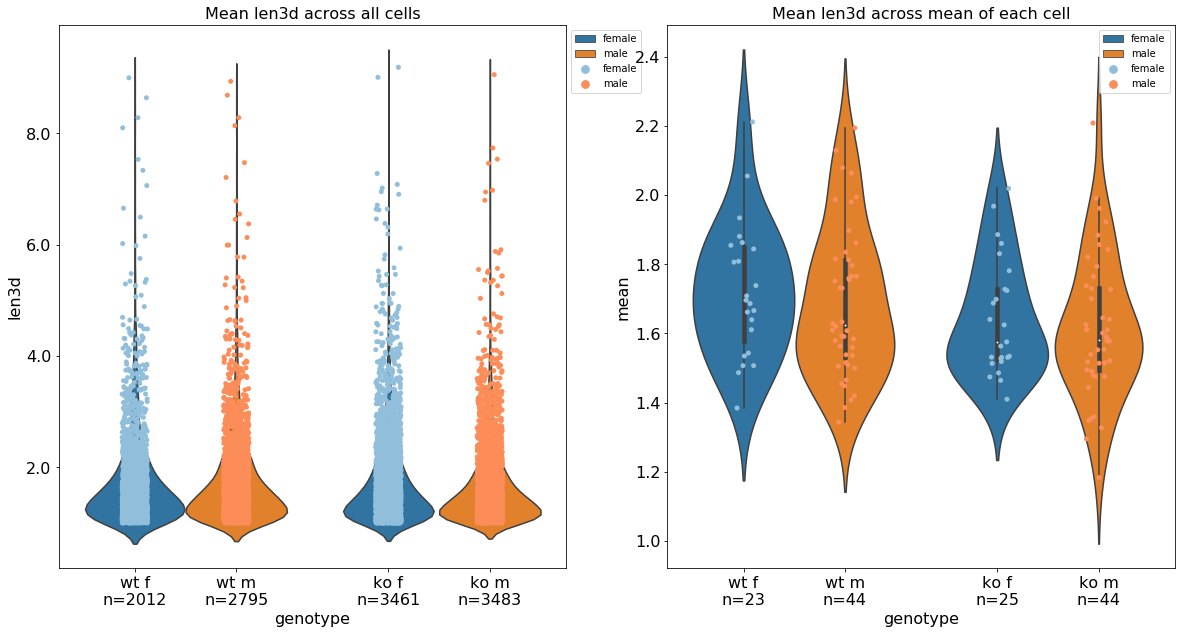

In [45]:
#fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,10))
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(20,10))
axs = np.ravel(axs) # flatten into 1D

pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d' # 'tortuosity'
pruneDict['minValue'] = 1 # only inlude branch length >= 2
pruneDict['branchType'] = [2,3] # brancType==2 are branches connected on both ends

# branch length across all cells (does not weight cells with low number or high number of branches)
ax = axs[0]
g1 = spa.plotCondMean(pruneDict, doCellMean=False, ax=ax)

# this can't be done in plotCondMean() ???
#spa.plotCondMeanLegend(ax)
'''
xAxisLabels = ['wt f\nn=xxx', 'wt m\nn=xxx', 'ko f\nn=xxx', 'ko m\nn=xxx']
ax.set_xticks([-0.2,0.2, 0.8,1.2])
ax.set_xticklabels(xAxisLabels)
'''

# branch length per cell
ax = axs[1]
g2 = spa.plotCondMean(pruneDict, doCellMean=True, ax=axs[1])
# show the plots
#plt.show()

# this is a bug in seaborn, we were getting spurious empy figure ax
# see:
#     https://github.com/mwaskom/seaborn/issues/1583
#     https://github.com/mwaskom/seaborn/issues/1514
'''
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
'''

### Histograms to compare groups, e.g. wtf vs wtm

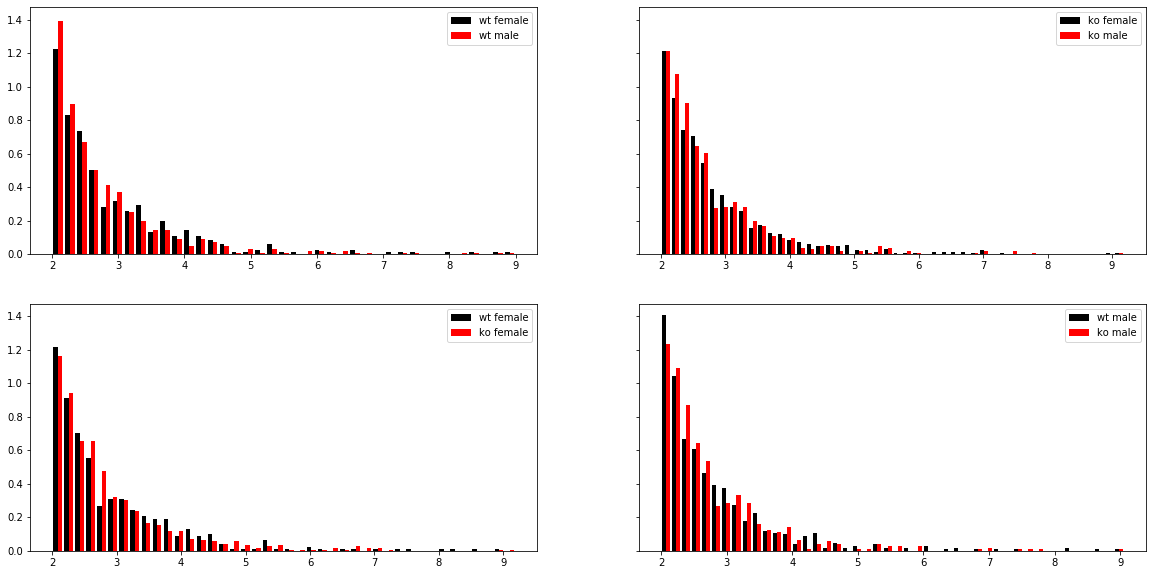

In [46]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(20,10))
axs = np.ravel(axs) # flatten

pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d' # 'tortuosity'
pruneDict['minValue'] = 2 # only inlude branch length >= 2
pruneDict['branchType'] = [2] # brancType==2 are branches connected on both ends

# 0
ax = axs[0]
pruneDict['genotype'] = ['wt']
pruneDict['sex'] = ['female', 'male']
spa.plotHist(pruneDict=pruneDict, ax=ax)

# 1
ax = axs[1]
pruneDict['genotype'] = ['ko']
pruneDict['sex'] = ['female', 'male']
spa.plotHist(pruneDict=pruneDict, ax=ax)

# 2
ax = axs[2]
pruneDict['genotype'] = ['wt', 'ko']
pruneDict['sex'] = ['female']
spa.plotHist(pruneDict=pruneDict, ax=ax)

# 3
ax = axs[3]
pruneDict['genotype'] = ['wt', 'ko']
pruneDict['sex'] = ['male']
spa.plotHist(pruneDict=pruneDict, ax=ax)


# Stats

### Table of cell means

In [47]:
pruneDict = spa.getDefaultPruneDict()
#pruneDict['genotype'] = ['wt']
#pruneDict['sex'] = ['male']
pruneDict['branchType'] = 2
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1

cellMean = spa.getCellMean(pruneDict)

display(cellMean.head())
display(cellMean.tail())


genotype     sex  myCellNumber      mean       std       sem  count
0       ko  female           0.0  1.723933  0.813834  0.053546    231
1       ko  female           1.0  1.830423  0.878221  0.041354    451
2       ko  female           2.0  1.698641  0.783671  0.039184    400
3       ko  female           3.0  1.967751  0.976656  0.047264    427
4       ko  female           4.0  1.860215  1.107120  0.061987    319

genotype   sex  myCellNumber      mean       std       sem  count
131       wt  male          39.0  1.994579  0.814657  0.090517     81
132       wt  male          40.0  1.419276  0.401088  0.056722     50
133       wt  male          41.0  1.755486  1.098458  0.137307     64
134       wt  male          42.0  1.765472  0.700118  0.065286    115
135       wt  male          43.0  1.609333  0.847470  0.091921     85

### Pairwise stas for each cell

In [48]:
# getPairwiseCellComparison() requires one [genotype] and one [sex]

pruneDict = spa.getDefaultPruneDict()
pruneDict['genotype'] = ['wt']
pruneDict['sex'] = ['male']
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 2
pruneDict['branchType'] = [2]

# p-value matrix
prob = spa.getPairwiseCellComparison(pruneDict)

display(prob)

cells         0         1         2         3         4          5  \
0       0  0.964619  0.140714  0.125506  0.372314  0.105193   0.819708   
1       1            0.935508  0.867632   0.25106  0.915106  0.0972544   
2       2                      0.665006  0.321079  0.816961    0.19949   
3       3                                0.990629  0.240955   0.228989   
4       4                                           0.88242   0.102684   
5       5                                                     0.973726   
6       6                                                                
7       7                                                                
8       8                                                                
9       9                                                                
10     10                                                                
11     11                                                                
12     12                                                                
13     13                                                                
14     14                                                                
15     15                                                                
16     16                                                                
17     17                                                                
18     18                                                                
19     19                                                                
20     20                                                                
21     21                                                                
22     22                                                                
23     23                                                                
24     24                                                                
25     25                                                                
26     26                                                                
27     27                                                                
28     28                                                                
29     29                                                                
30     30                                                                
31     31                                                                
32     32                                                                
33     33                                                                
34     34                                                                
35     35                                                                
36     36                                                                
37     37                                                                
38     38                                                                
39     39                                                                
40     40                                                                
41     41                                                                
42     42                                                                
43     43                                                                

            6         7          8  ...         34         35         36  \
0     0.77139  0.426777  0.0485396  ...  0.0548486   0.122361   0.110612   
1   0.0983804  0.516868   0.948533  ...    0.55101   0.556608    0.58042   
2    0.173273   0.55569   0.896125  ...   0.413407   0.321079   0.621685   
3    0.317898  0.878936  0.0869384  ...   0.286191   0.518605   0.349458   
4   0.0903812  0.315874   0.932324  ...   0.411837   0.455545   0.396088   
5    0.814834  0.447412  0.0117871  ...  0.0527975   0.131431   0.100668   
6    0.996012   0.36914  0.0282507  ...  0.0320129  0.0910898  0.0830885   
7              0.964619   0.360644  ...   0.504789   0.711446   0

## Group means

### This is the most important part, we can compare significant difference between groups while varying the analysis parameters.

```
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
```

### Here we can calculate group means (e.g. wtf, wtm, kof, kom) across all measurements or by taking the main of mean within cells using doCellMean=True.

In [50]:
pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
pruneDict['statTest'] = 'Mann-Whitney' # one of ('T-Test', 'Mann-Whitney', 'Kruskal-Wallis')

# this pools all measurements across all cells (does not use mean within a cell)
print('Lumping all measurements across cells. Cell with more measurements contribute more !!!')
df1, df2 = spa.getPairwiseGroupComparison(pruneDict, doCellMean=False)

display(df1)
display(df2)

# this pools across the mean within each cell. 
print('Stats based on the "mean" from each cell')
df1, df2 = spa.getPairwiseGroupComparison(pruneDict, doCellMean=True)

display(df1)
display(df2)


Lumping all measurements across cells. Cell with more measurements contribute more !!!


groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)     0.999989     0.7506     0.925932    0.001060
1    (wt, male)                0.999993     0.822172    0.000073
2  (ko, female)                             0.999995    0.000117
3    (ko, male)                                         0.999995

name      mean       std       sem     n            f            p
0   (wt, female)  1.720705  0.849302  0.018939  2012                          
1   (wt, female)  1.720705  0.849302  0.018939  2012  2.02407e+06     0.999989
2   (wt, female)  1.720705  0.849302  0.018939  2012                          
3     (wt, male)  1.708964  0.795462  0.015049  2795  2.79668e+06       0.7506
4   (wt, female)  1.720705  0.849302  0.018939  2012                          
5   (ko, female)  1.721109  0.817336  0.013895  3461  3.47653e+06     0.925932
6   (wt, female)  1.720705  0.849302  0.018939  2012                          
7     (ko, male)  1.632382  0.714659  0.012111  3483  3.68938e+06   0.00106008
8     (wt, male)  1.708964  0.795462  0.015049  2795                          
9     (wt, male)  1.708964  0.795462  0.015049  2795  3.90601e+06     0.999993
10    (wt, male)  1.708964  0.795462  0.015049  2795                          
11  (ko, female)  1.721109  0.817336  0.013895  3461  4.85271e+06     0.822172
12    (wt, male)  1.708964  0.795462  0.015049  2795                          
13    (ko, male)  1.632382  0.714659  0.012111  3483  5.15066e+06  7.26188e-05
14  (ko, female)  1.721109  0.817336  0.013895  3461                          
15  (ko, female)  1.721109  0.817336  0.013895  3461  5.98926e+06     0.999995
16  (ko, female)  1.721109  0.817336  0.013895  3461                          
17    (ko, male)  1.632382  0.714659  0.012111  3483  6.34904e+06  0.000117359
18    (ko, male)  1.632382  0.714659  0.012111  3483                          
19    (ko, male)  1.632382  0.714659  0.012111  3483  6.06564e+06     0.999995

Stats based on the "mean" from each cell


groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)      0.99123   0.416722     0.154449    0.035184
1    (wt, male)                 0.99667     0.406443    0.134137
2  (ko, female)                             0.992255    0.630783
3    (ko, male)                                         0.996670

name      mean       std       sem   n      f         p
0   (wt, female)  1.722877  0.191740  0.040879  23                 
1   (wt, female)  1.722877  0.191740  0.040879  23  264.5   0.99123
2   (wt, female)  1.722877  0.191740  0.040879  23                 
3     (wt, male)  1.688706  0.212070  0.032340  44    568  0.416722
4   (wt, female)  1.722877  0.191740  0.040879  23                 
5   (ko, female)  1.644180  0.164012  0.033479  25    357  0.154449
6   (wt, female)  1.722877  0.191740  0.040879  23                 
7     (ko, male)  1.614065  0.201646  0.030751  44    666  0.035184
8     (wt, male)  1.688706  0.212070  0.032340  44                 
9     (wt, male)  1.688706  0.212070  0.032340  44    968   0.99667
10    (wt, male)  1.688706  0.212070  0.032340  44                 
11  (ko, female)  1.644180  0.164012  0.033479  25    617  0.406443
12    (wt, male)  1.688706  0.212070  0.032340  44                 
13    (ko, male)  1.614065  0.201646  0.030751  44   1148  0.134137
14  (ko, female)  1.644180  0.164012  0.033479  25                 
15  (ko, female)  1.644180  0.164012  0.033479  25  312.5  0.992255
16  (ko, female)  1.644180  0.164012  0.033479  25                 
17    (ko, male)  1.614065  0.201646  0.030751  44    589  0.630783
18    (ko, male)  1.614065  0.201646  0.030751  44                 
19    (ko, male)  1.614065  0.201646  0.030751  44    968   0.99667

### Compare different analysis parameters

In [51]:

# just use cell mean. If we don't, cells get weighted different based on number of branches

pruneDict = spa.getDefaultPruneDict()
pruneDict['statTest'] = 'Mann-Whitney' # one of ('T-Test', 'Mann-Whitney', 'Kruskal-Wallis')
pruneDict['statName'] = 'len3d'

wtf_vs_wtm = [] # collect p-values for each run

print('branchType=[2]')
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
df1a, df2a = spa.getPairwiseGroupComparison(pruneDict, doCellMean=True)
df1n = spa.getCounts(pruneDict, asDict=False)
display(df1a)
display(df1n)

# b
print('branchType=[]')
pruneDict['minValue'] = 1
pruneDict['branchType'] = []
df1b, df2b = spa.getPairwiseGroupComparison(pruneDict, doCellMean=True)
df1n = spa.getCounts(pruneDict, asDict=False)
display(df1b)
display(df1n)


branchType=[2]


groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)      0.99123   0.416722     0.154449    0.035184
1    (wt, male)                 0.99667     0.406443    0.134137
2  (ko, female)                             0.992255    0.630783
3    (ko, male)                                         0.996670

genotype     sex  nRaw  nCell
0       wt  female  2012     23
1       wt    male  2795     44
2       ko  female  3461     25
3       ko    male  3483     44

branchType=[]


groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)      0.99123     0.3657     0.231315    0.026975
1    (wt, male)                 0.99667     0.712671    0.123631
2  (ko, female)                             0.992255    0.327099
3    (ko, male)                                         0.996670

genotype     sex  nRaw  nCell
0       wt  female  2739     23
1       wt    male  3961     44
2       ko  female  4861     25
3       ko    male  4380     44

In [62]:
# move this up
from ipywidgets import Layout, Button, Box

branchTypeList = [[], [0], [1], [2], [3], [1,2]]

global df1a, df2a, df1n, df2n

pruneDict1 = spa.getDefaultPruneDict()
pruneDict1['branchType'] = []
pruneDict1['minValue'] = 0
df1a, df1b = spa.getPairwiseGroupComparison(pruneDict1, doCellMean=True)
df1n = spa.getCounts(pruneDict1, asDict=False)
#
pruneDict2 = spa.getDefaultPruneDict()
pruneDict2['branchType'] = []
pruneDict2['minValue'] = 0
df2a, df2b = spa.getPairwiseGroupComparison(pruneDict2, doCellMean=True)
df2n = spa.getCounts(pruneDict2, asDict=False)

# not sure why this behavior, variable declared global can be used inside function def()
#global branchType_Dropdown1, minValue_FloatSlider1

# put controls in an H Box layout
myHBoxLayout1 = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid 1px',
                    width='50%')

#
# 1
branchTypeName1 = 'Branch Type 1'
style = {'description_width': 'initial'}
branchType_Dropdown1 = ipywidgets.Dropdown(
    options=branchTypeList,
    value=[],
    style=style,
    description=branchTypeName1,
)

minValue1 = 'Min Value 1'
minValue_FloatSlider1 = ipywidgets.FloatSlider(
    value=0,
    min=0,
    max=10.0,
    step=0.1,
    description=minValue1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

items = [branchType_Dropdown1, minValue_FloatSlider1]
hBox1 = Box(children=items, layout=myHBoxLayout1)
#display(hBox1)

#
# 2
branchTypeName2 = 'Branch Type 2'
style = {'description_width': 'initial'}
branchType_Dropdown2 = ipywidgets.Dropdown(
    options=branchTypeList,
    value=[],
    style=style,
    description=branchTypeName2,
)

minValueName2 = 'Min Value 2'
minValue_FloatSlider2 = ipywidgets.FloatSlider(
    value=0,
    min=0,
    max=10.0,
    step=0.1,
    description=minValueName2,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

items = [branchType_Dropdown2, minValue_FloatSlider2]
hBox2 = Box(children=items, layout=myHBoxLayout1)
#display(hBox1)

def myDisplay():
    display(df1a)
    display(df1n)
    display(hBox1)
    #display(branchType_Dropdown1)
    #display(minValue_FloatSlider1)
    #
    display(df2a)
    display(df2n)
    display(hBox2)
    #display(branchType_Dropdown2)
    #display(minValue_FloatSlider2)
    
def on_change(change):
    global df1a, df2a, df1n, df2n
    if change['type'] == 'change' and change['name'] == 'value':
        #print('change:', change)
        #print('=== change["owner"].description:', change["owner"].description)
        #print('changed to:', change['new'], type(change['new']))
        newValue = change['new'] # can be (str, float)
        description = change["owner"].description
        #print('description:', description)
        
        # 1
        if description == branchTypeName1:
            pruneDict1['branchType'] = newValue
            df1a, df1b = spa.getPairwiseGroupComparison(pruneDict1, doCellMean=True)
            df1n = spa.getCounts(pruneDict1, asDict=False)
            #
            clear_output(wait=True)
            myDisplay()
        elif description == minValue1:
            pruneDict1['minValue'] = newValue
            df1a, df1b = spa.getPairwiseGroupComparison(pruneDict1, doCellMean=True)
            df1n = spa.getCounts(pruneDict1, asDict=False)
            #
            clear_output(wait=True)
            myDisplay()

        # 2
        elif description == branchTypeName2:
            pruneDict2['branchType'] = newValue
            df2a, df2b = spa.getPairwiseGroupComparison(pruneDict2, doCellMean=True)
            df2n = spa.getCounts(pruneDict2, asDict=False)
           #
            clear_output(wait=True)
            myDisplay()
        elif description == minValueName2:
            pruneDict2['minValue'] = newValue
            df2a, df2b = spa.getPairwiseGroupComparison(pruneDict2, doCellMean=True)
            df2n = spa.getCounts(pruneDict2, asDict=False)
           #
            clear_output(wait=True)
            myDisplay()

# 1
branchType_Dropdown1.observe(on_change)
minValue_FloatSlider1.observe(on_change)
# 2
branchType_Dropdown2.observe(on_change)
minValue_FloatSlider2.observe(on_change)

myDisplay()



groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)      0.99123    0.45561     0.116775    0.287772
1    (wt, male)                 0.99667     0.274689    0.596162
2  (ko, female)                             0.992255    0.413537
3    (ko, male)                                         0.996670

genotype     sex   nRaw  nCell
0       wt  female   7684     23
1       wt    male  10721     44
2       ko  female  12341     25
3       ko    male  11489     44

Box(children=(Dropdown(description='Branch Type 1', options=([], [0], [1], [2], [3], [1, 2]), style=Descriptio…

groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)      0.99123  0.0779177     0.522326    0.000777
1    (wt, male)                 0.99667     0.248194    0.089456
2  (ko, female)                             0.992255    0.010682
3    (ko, male)                                         0.996670

genotype     sex  nRaw  nCell
0       wt  female   558     23
1       wt    male   761     44
2       ko  female  1057     25
3       ko    male   619     44

Box(children=(Dropdown(description='Branch Type 2', index=2, options=([], [0], [1], [2], [3], [1, 2]), style=D…